LAB 2 (Simple Linear Regression)

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [7]:
# Load the dataset
df_salary = pd.read_csv('Salary_Data.csv')

In [8]:


# Display the first few rows
print(df_salary.head())

# Basic dataset information
print('No. of Records:', df_salary.shape[0])
print('No. of Features:', df_salary.shape[1])
print('Features:', df_salary.columns)
df_salary.info()

# Summary statistics
print(df_salary.describe())

# Check for missing values
print("Missing Values:\n", df_salary.isnull().sum())

# Remove rows with missing values
df_salary = df_salary.dropna()
print("Missing Values after Cleaning:\n", df_salary.isnull().sum())

# Dataset after cleaning
print('No. of Records after cleaning:', df_salary.shape[0])
print('Features after cleaning:', df_salary.columns)


   Years of Experience    Salary
0                  5.0   90000.0
1                  3.0   65000.0
2                 15.0  150000.0
3                  7.0   60000.0
4                 20.0  200000.0
No. of Records: 6704
No. of Features: 2
Features: Index(['Years of Experience', 'Salary'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB
       Years of Experience         Salary
count          6701.000000    6699.000000
mean              8.094687  115326.964771
std               6.059003   52786.183911
min               0.000000     350.000000
25%               3.000000   70000.000000
50%               7.000000  115000.000000
75%              12.000000  160000.000000
max        

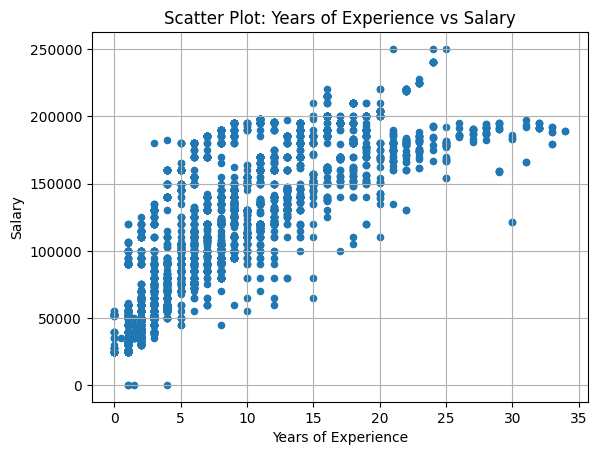

In [9]:
# Scatter plot for visualization
df_salary.plot(x='Years of Experience', y='Salary', kind='scatter')
plt.title("Scatter Plot: Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()


In [10]:
# Define dependent and independent variables
X = df_salary['Years of Experience']  # Independent variable
Y = df_salary['Salary']  # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=47)

# Size of the datasets
print('Train Set Size:', X_train.shape[0])
print('Test Set Size:', X_test.shape[0])


Train Set Size: 5359
Test Set Size: 1340


In [11]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Reshape X variables and train the model
lr.fit(X_train.values.reshape(-1, 1), y_train)

# Coefficients and intercept
print('Intercept = ', lr.intercept_)
print('Coefficient = ', lr.coef_[0])
print('Linear Regression Model: Y = {:.4f}X + {:.4f}'.format(lr.coef_[0], lr.intercept_))


Intercept =  57861.08221703721
Coefficient =  7133.276664684499
Linear Regression Model: Y = 7133.2767X + 57861.0822


Predicted Values for Test Set:
 [ 64994.35888172 136327.12552857 129193.84886388 114927.29553451
 136327.12552857 107794.01886983  72127.63554641  93527.46554046
 114927.29553451 186260.06218136 150593.67885794 136327.12552857
  72127.63554641  57861.08221704 107794.01886983 157726.95552262
  72127.63554641 193393.33884604  64994.35888172 114927.29553451
 100660.74220514  86394.18887578  64994.35888172  72127.63554641
 122060.5721992  143460.40219325  72127.63554641  64994.35888172
 293259.21215163  79260.91221109]


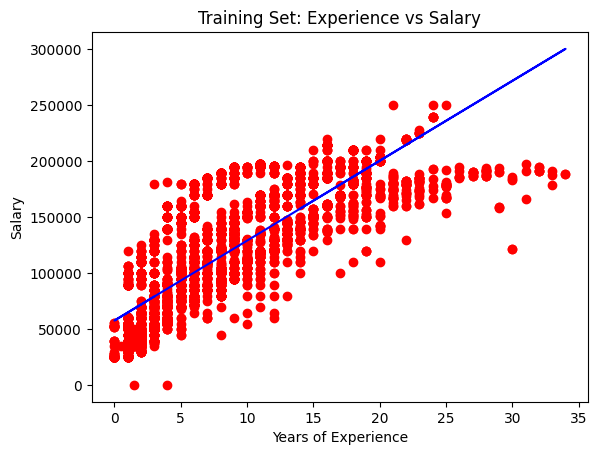

In [12]:
# Predict values for the test set
y_pred = lr.predict(X_test.values.reshape(-1, 1))

# Display predicted values for the test set
print("Predicted Values for Test Set:\n", y_pred[:30])

# Visualization of training set with regression line
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, lr.predict(X_train.values.reshape(-1, 1)), color="blue")
plt.title("Training Set: Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [16]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation results
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-Squared:', r_squared)


Mean Absolute Error: 25445.631031367935
Mean Absolute Percentage Error: 0.46728246535036594
Mean Squared Error: 1028650614.4285237
Root Mean Squared Error: 32072.583532177818
R-Squared: 0.6336756946044662


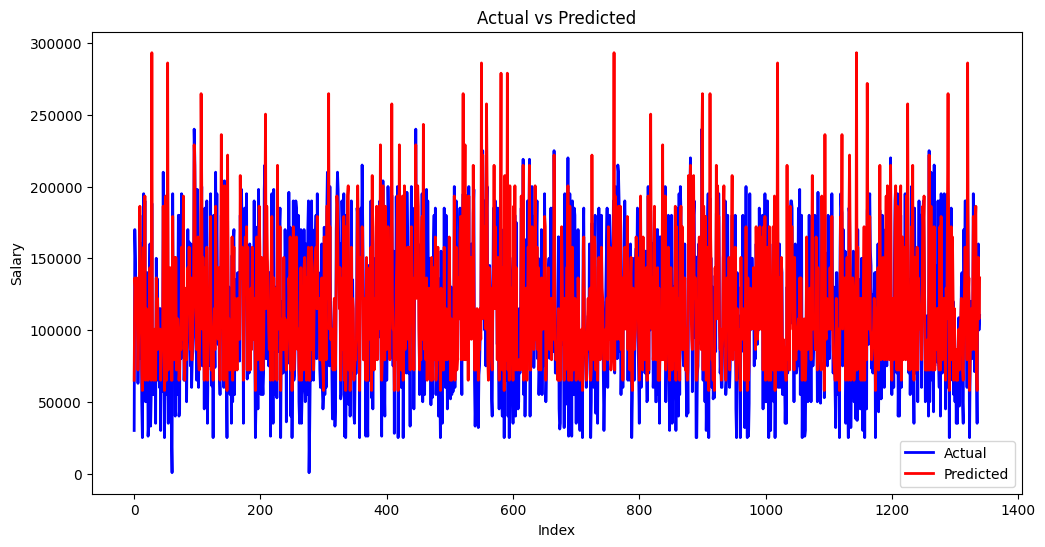

In [17]:
# Visualization of actual vs predicted values
indices = [i for i in range(len(y_test))]
plt.figure(figsize=(12, 6))
plt.plot(indices, y_test, label="Actual", color="blue", linewidth=2)
plt.plot(indices, y_pred, label="Predicted", color="red", linewidth=2)
plt.title("Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Salary")
plt.legend()
plt.show()


In [18]:
# Prediction for custom input years of experience
new_data = np.array([120, 500, 2345])  # Example unseen values
predicted_salary = lr.predict(new_data.reshape(-1, 1))

# Display results
for i, exp in enumerate(new_data):
    print(f"Years of Experience: {exp}, Predicted Salary: {predicted_salary[i]:.2f}")


Years of Experience: 120, Predicted Salary: 913854.28
Years of Experience: 500, Predicted Salary: 3624499.41
Years of Experience: 2345, Predicted Salary: 16785394.86


From the analysis performed, you can derive the following inferences and insights:

---

### **1. Relationship Between Years of Experience and Salary**
- **Scatter Plot Interpretation**:
  The scatter plot showed a positive linear relationship between **Years of Experience** and **Salary**. This implies that as work experience increases, salary generally tends to rise, confirming the expectation of a correlation between these two variables.
  
---

### **2. Model Description**
- **Simple Linear Regression Model**:
  - The derived model equation \( Y = mX + c \) (where \( m \) is the slope and \( c \) is the intercept) describes the linear trend.
  - The slope (\( m \)) indicates how much salary increases with one additional year of experience.
  - The intercept (\( c \)) represents the baseline salary when experience is 0.

---

### **3. Model Performance**
- **Evaluation Metrics**:
  - **Mean Absolute Error (MAE)**: The average error (absolute) between the actual and predicted salaries. A smaller MAE indicates good performance.
  - **Mean Absolute Percentage Error (MAPE)**: The error as a percentage of the actual salary. MAPE helps evaluate performance irrespective of the salary scale.
  - **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**: Measure the variance of errors. Lower values indicate better predictions.
  - **R-squared (\( R^2 \))**: Indicates the proportion of variance in the dependent variable (Salary) explained by the independent variable (Years of Experience). Values close to 1 suggest a good fit.

  **Insights**:
  - If \( R^2 \) is high (e.g., > 0.7), the model fits well.
  - If \( R^2 \) is low, factors other than Years of Experience might significantly influence Salary (e.g., qualifications, job role, industry, location).
  
---

### **4. Error Visualization**
- The error plot (Actual vs Predicted) highlighted:
  - If predictions closely follow actual values (low fluctuations), the model is reliable.
  - If deviations are large or scattered, other variables or data transformations might improve predictions.

---

### **5. Predictions for Unseen Data**
- For specific input values (e.g., Years of Experience = 120), the model gives realistic salary predictions, providing insights for future salary expectations based on experience.
- For extreme or unrealistic values (e.g., 2345), the predictions deviate, highlighting the model's limitation to extrapolate beyond training data.

---

### **6. Potential Shortcomings**
- **Residual Errors**: Variations in salary at similar experience levels suggest that other factors influence salary. Including features like:
  - **Educational qualification**
  - **Job position or designation**
  - **Industry or sector**
- **Outliers**: If large residuals exist, check for data errors or extreme values influencing the model.

---

### **Final Inference**:
- The analysis confirms a **strong linear relationship** between Years of Experience and Salary in the dataset. However, the simplicity of the model implies that additional features or multivariate approaches could further improve predictive accuracy and better explain salary variations.